In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('combined_scrape_2.csv')

In [3]:
df.shape

(3543710, 4)

In [4]:
df.head()

,Comment Text,Author,Subreddit,Post ID
0,"Just curious, but what triggered your feelings...",PDXorax,YangForPresidentHQ,ew5ohva
1,Christmas time put up a light-up Yang sign!,PDXorax,YangForPresidentHQ,ew5o8vv
2,"During the general election, get in contact wi...",PDXorax,YangForPresidentHQ,ew42bdx
3,"We need to understand as a country, that the m...",PDXorax,YangForPresidentHQ,evva7l8
4,"Part of the reason for this, is because we nee...",PDXorax,YangForPresidentHQ,evoo179


In [5]:
df_target_train = pd.read_csv('fin_users_train.csv')

In [6]:
df_target_train.shape

(2487, 2)

In [7]:
df_target_test = pd.read_csv('fin_users_test.csv')

In [8]:
df_target_test.shape

(830, 2)

In [9]:
df_target = pd.concat([df_target_test,df_target_train])

In [10]:
df_target.shape

(3317, 2)

In [11]:
users = list(df_target['Unnamed: 0'])

In [12]:
def clean_df(row):
    if row['Author'] in users:
        return '1'
    else:
        return '0'


In [13]:
df['keep'] = df.apply(clean_df,axis=1)

In [14]:
df = df[df['keep']=='1']

In [15]:

sum_series = df.groupby(['Author','Subreddit']).size()

In [16]:
list_of_subs = ['ENLIGHTENEDCENTRISM','Fuckthealtright','LateStageCapitalism','ABoringDystopia','baseball','redsox',
    'NewYorkMets','NYYankees','nba','CollegeBasketball','lakers','bostonceltics','sixers','Conservative','tuesday',
    'CryptoCurrency','Bitcoin','sysadmin','cscareerquestions','nfl','CFB','CHIBears','freefolk','gameofthrones',
    'asoiaf','buildapcsales','Amd','pokemon','TheSilphRoad','soccer','MLS','Games','gaming','collapse','conspiracy',
    'neoliberal','pcmasterrace','stupidpol','moderatepolitics','Android','anime','apple','askgaybros','atheism',
    'aznidentity','BasicIncome','BigBrother','books','cars','Christianity','Documentaries','Economics','environment',
    'exmormon','fantasyfootball','formula1','Futurology','hiphopheads','hockey','investing','JoeRogan',
    'JordanPeterson','keto','liberalgunowners','Libertarian','marvelstudios','MMA','movies','Music','rupaulsdragrace',
    'samharris','science','space','SquaredCircle','StarWars','survivor','technology','teenagers','television',
    'teslamotors','thebachelor','thedavidpakmanshow','TheLastAirbender','Tinder','trees','TwoXChromosomes','vegan',
    'cats','Cricket','Fitness','golf','gratefuldead','HomeImprovement','startrek']

In [17]:
features = {}
for user in users:
    feature_dict = {}
    for sub in sum_series[user].index:
        if sub in list_of_subs:
            feature_dict[sub]=sum_series[user][sub]
    if len(feature_dict)!=0:
        features[user]=feature_dict


In [18]:
df_feature = pd.DataFrame(features).T

In [19]:
df_feature.head()

,ABoringDystopia,Amd,Android,BasicIncome,BigBrother,Bitcoin,CFB,CHIBears,Christianity,CollegeBasketball,...,sysadmin,technology,teenagers,television,teslamotors,thebachelor,thedavidpakmanshow,trees,tuesday,vegan
Boomslangalang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bczeon27,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
madosooki,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
krom0025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN
Its_not_him,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [20]:
df_feature.shape

(2891, 94)

In [21]:
df_feature.fillna(0,inplace=True)

In [22]:
df_feature.sum().sum()

324964.0

In [23]:
#add code to combine like minded subs
df_feature['anti_alt_right_comb']=df_feature['ENLIGHTENEDCENTRISM']+df_feature['Fuckthealtright']
df_feature['bad_capitalism_comb']=df_feature['LateStageCapitalism']+df_feature['ABoringDystopia']
df_feature['baseball_comb']=df_feature['baseball']+df_feature['redsox']+df_feature['NYYankees']+df_feature['NewYorkMets']
df_feature['basketball_comb']=df_feature['nba']+df_feature['CollegeBasketball']+df_feature['lakers']+df_feature['bostonceltics']+df_feature['sixers']
df_feature['conservative_comb']=df_feature['Conservative']+df_feature['tuesday']
df_feature['crypto_comb']=df_feature['CryptoCurrency']+df_feature['Bitcoin']
df_feature['CS_comb']=df_feature['sysadmin']+df_feature['cscareerquestions']
df_feature['football_comb']=df_feature['nfl']+df_feature['CFB']+df_feature['CHIBears']
df_feature['got_comb']=df_feature['freefolk']+df_feature['gameofthrones']+df_feature['asoiaf']
df_feature['pc_comb']=df_feature['buildapcsales']+df_feature['Amd']
df_feature['soccer_comb']=df_feature['soccer']+df_feature['MLS']
df_feature['gaming_comb']=df_feature['gaming']+df_feature['Games']
df_feature['pokemon_comb']=df_feature['pokemon']+df_feature['TheSilphRoad']

In [24]:
#remove above single subs
df_feature.drop(['ENLIGHTENEDCENTRISM','Fuckthealtright','LateStageCapitalism','ABoringDystopia','NewYorkMets','redsox',
                 'baseball','NYYankees','nba','CollegeBasketball','sixers','lakers','bostonceltics','Conservative','tuesday',
                 'CryptoCurrency','Bitcoin','sysadmin','cscareerquestions','nfl','CFB','CHIBears',
                 'freefolk','gameofthrones','asoiaf','soccer','MLS','buildapcsales','Amd','Games','gaming','pokemon','TheSilphRoad'],axis=1,inplace=True)

In [25]:
df_feature.sum().sum()

324964.0

In [26]:
df_feature = df_feature.div(df_feature.sum(axis=1), axis=0)

In [27]:
df_feature.head(20)

,Android,BasicIncome,BigBrother,Christianity,Cricket,Documentaries,Economics,Fitness,Futurology,HomeImprovement,...,basketball_comb,conservative_comb,crypto_comb,CS_comb,football_comb,got_comb,pc_comb,soccer_comb,gaming_comb,pokemon_comb
Boomslangalang,0.0,0.000000,0.0,0.0,0.000000,0.111111,0.000000,0.000000,0.027778,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.0
bczeon27,0.0,0.133333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,...,0.000000,0.000000,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
madosooki,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.050000,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
krom0025,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003846,0.000000,0.000000,0.000000,0.003846,0.0
Its_not_him,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,...,0.022727,0.000000,0.000000,0.000000,0.011364,0.000000,0.000000,0.590909,0.011364,0.0
staiano,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.228070,0.000000,0.000000,0.114035,0.078947,0.000000,0.000000,0.000000,0.000000,0.0
bintherematthat,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.016949,0.000000,0.000000,0.000000,...,0.050847,0.101695,0.000000,0.000000,0.779661,0.000000,0.000000,0.000000,0.000000,0.0
silvathena,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Ghee_Guys,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.008889,0.004444,0.022222,...,0.000000,0.000000,0.000000,0.000000,0.653333,0.075556,0.000000,0.000000,0.004444,0.0
Zernin,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [28]:
df_target_train = df_target_train.set_index('Unnamed: 0')

In [29]:
df_target_test = df_target_test.set_index('Unnamed: 0')

In [30]:
df_feature.shape

(2891, 74)

In [31]:
df_train = pd.concat([df_feature,df_target_train],axis=1,join='inner')

In [32]:
df_test = pd.concat([df_feature,df_target_test],axis=1,join='inner')

In [33]:
df_train.shape

(2173, 75)

In [34]:
df_test.shape

(718, 75)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression(solver='lbfgs')

In [37]:
X_train = df_train.drop('target',axis=1)

In [38]:
y_train = df_train['target']

In [39]:
X_test = df_test.drop('target',axis=1)

In [40]:
y_test = df_test['target']

In [41]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
lr.score(X_train,y_train)

0.771744132535665

In [43]:
y_train.value_counts(normalize=True)

0    0.735849
1    0.264151
Name: target, dtype: float64

In [44]:
lr.score(X_test,y_test)

0.7646239554317549

In [45]:
y_test.value_counts(normalize=True)

0    0.736769
1    0.263231
Name: target, dtype: float64

In [46]:
pd.Series(lr.predict(X_test)).value_counts(normalize=True)

0    0.924791
1    0.075209
dtype: float64

In [47]:
results = pd.DataFrame(lr.coef_.T,X_test.columns)

In [48]:
results.head()

,0
Android,0.950833
BasicIncome,3.778120
BigBrother,-1.148972
Christianity,-0.404623
Cricket,-0.395387


(array([0., 1., 4., 2., 3., 4., 5., 2., 5., 3., 3., 2., 5., 2., 2., 1., 2.,
        1., 0., 1.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 20 Patch objects>)

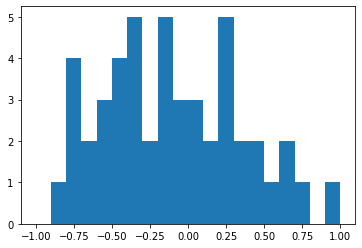

In [49]:
plt.hist(results[0],bins=20,range=(-1,1))

In [50]:
results[abs(results[0])<.3]

,0
SquaredCircle,0.261824
apple,0.260132
collapse,-0.164239
exmormon,0.039454
fantasyfootball,0.293713
formula1,-0.050711
golf,0.030270
moderatepolitics,-0.209392
pcmasterrace,0.105562
science,-0.285040


In [51]:
#let's run through this notebook again with these columns dropped